# Decision Tree

In [1]:
# import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer # load...
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,  cross_validate
# import pandas
import pandas as pd

In [ ]:
from sklearn import datasets
dir(datasets)

In [ ]:
bc = load_breast_cancer(as_frame=True)
# print(bc.DESCR) (Nombre de las variables)
print(bc.feature_names)
# Ver los nombres de las clases (0,1)
print(bc.target_names) # 0 malignant 1 benignprint(bc.target_names) # 0 malignant 1 benign
# Convvert to dataframe
df_bc = pd.DataFrame(data=bc.data)
df_bc['target'] = bc.target
# convert to categorical
df_bc['target'] = df_bc['target'].astype('category')

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [ ]:
# print(df_bc.head())
print(df_bc.info())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [22]:
# print(df_bc.describe())
print(df_bc.shape)
df_bc.groupby('target').size()
df_bc.value_counts(subset='target',normalize=True)

(569, 31)


C:\Users\arthu\AppData\Local\Temp\ipykernel_27388\718724224.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bc.groupby('target').size()


target
1    0.627417
0    0.372583
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='target'>

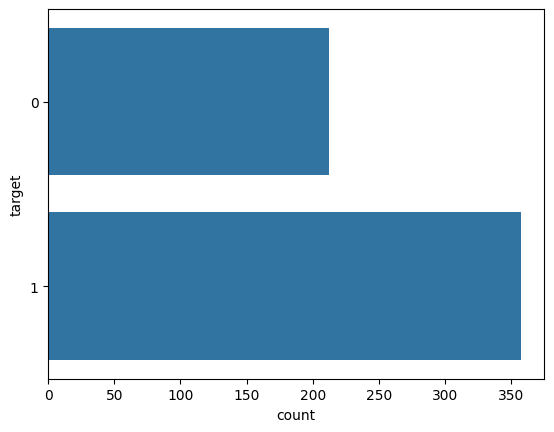

In [12]:
import seaborn as sns
# 1st graph
sns.countplot(df_bc['target'])

In [23]:
# split the dataset into 80% train, 20%test
X = df_bc.drop(columns='target')
y = df_bc['target']
SEED = 2025
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 stratify=y,
                                                 random_state=SEED)

In [32]:
print(y_train.value_counts(normalize=False))
print(y_test.value_counts(normalize=False))


target
1    285
0    170
Name: count, dtype: int64
target
1    72
0    42
Name: count, dtype: int64


In [36]:
# Instantiate DecisionTree (dt)
dt = DecisionTreeClassifier(criterion='gini',
                            max_depth=2,
                             random_state= 1)

In [37]:
# Fit dt to the training set
dt.fit(X_train,y_train) #  Aquí el modelo se entrena y "queda listo"
# Predict the best set labels
y_pred = dt.predict(X_test)
# Evaluate the test.set accuracy
accuracy_score(y_test, y_pred)

0.9298245614035088

Ver modelos_data_credito2.ipynb para convertir a cetgorico un varias variables por medio del for
tambien te enseñanm a imputar